In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import pandas as pd
from arrakis_nd import *
import seaborn as sn
import h5flow


In [382]:
arr = np.load('../test.npz.arrakis_nd.npz', allow_pickle=True)

In [393]:
event = 1

In [394]:
x = arr['data'].tolist()[event].data['x']
y = arr['data'].tolist()[event].data['y']
z = arr['data'].tolist()[event].data['z']
q = arr['data'].tolist()[event].data['Q']
particle_labels = arr['data'].tolist()[event].data['particle_label']
physics_labels = arr['data'].tolist()[event].data['physics_label']
topology_labels = arr['data'].tolist()[event].data['topology_label']

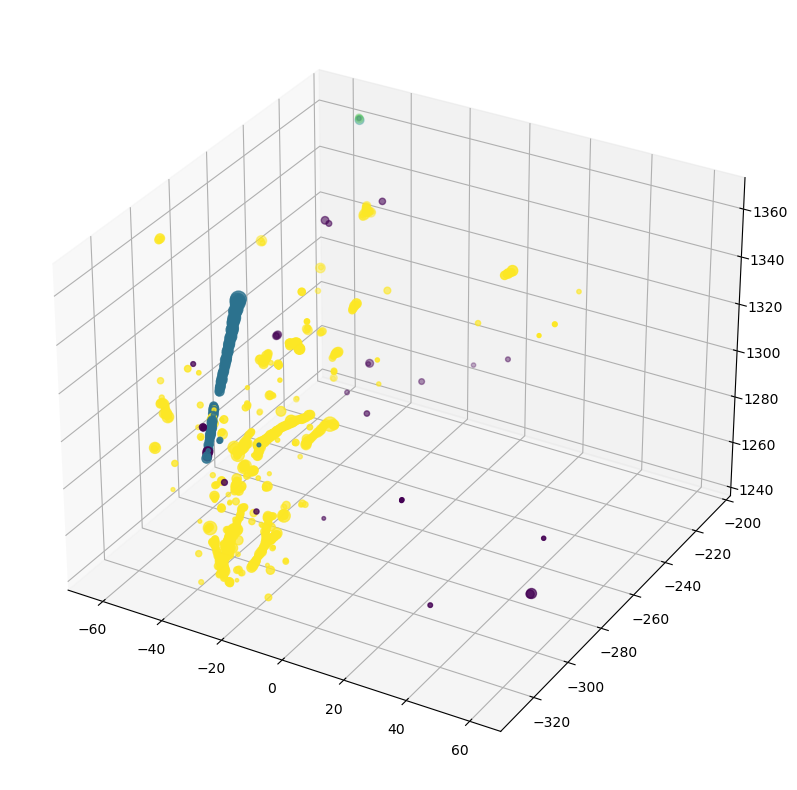

In [395]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c=physics_labels,s=q)

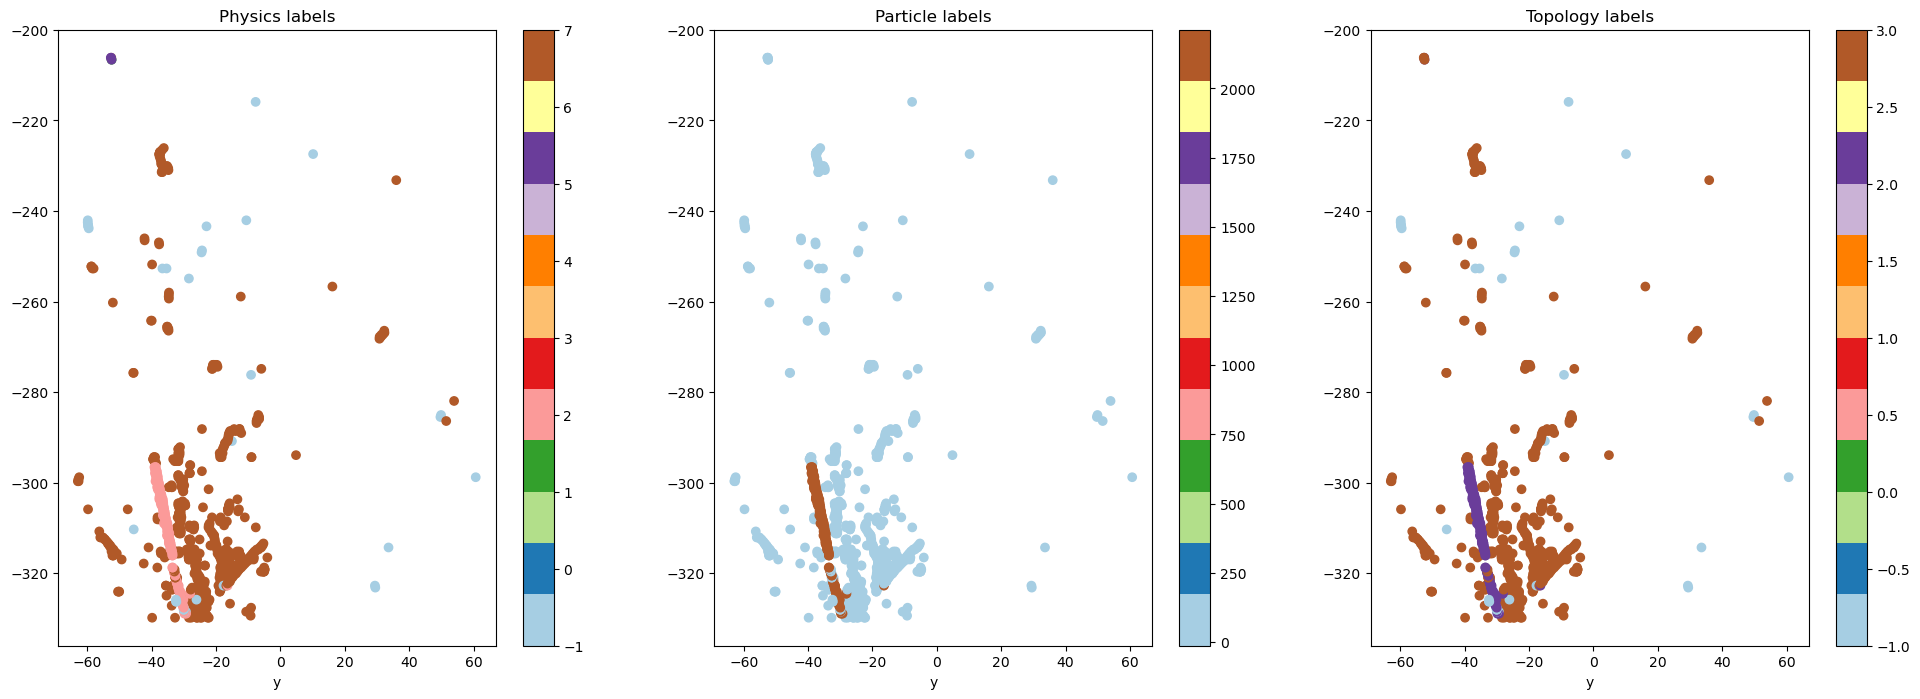

In [396]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))
plot1 = axs[0].scatter(x,y, c=physics_labels, cmap='Paired')
axs[0].set_title('Physics labels')
axs[0].set_xlabel('x')
axs[0].set_xlabel('y')
plt.colorbar(plot1, ax=axs[0])
plot2 = axs[1].scatter(x,y, c=particle_labels, cmap='Paired')
axs[1].set_title('Particle labels')
axs[1].set_xlabel('x')
axs[1].set_xlabel('y')
plt.colorbar(plot2, ax=axs[1])
plot3 = axs[2].scatter(x,y, c=topology_labels, cmap='Paired')
axs[2].set_title('Topology labels')
axs[2].set_xlabel('x')
axs[2].set_xlabel('y')
plt.colorbar(plot3, ax=axs[2])

plt.show()

In [397]:
df = pd.DataFrame(columns=['x', 'y', 'z', 'particle_label', 'physics_label', 'topology_label', 'unique_topology'])
particle_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['particle_labels'], orient='index', columns=['particle_label_text']).reset_index()
physics_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['physics_labels'], orient='index', columns=['physics_label_text']).reset_index()
topology_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['topology_labels'], orient='index', columns=['topology_label_text']).reset_index()
df['x'] = arr['data'].tolist()[event].data['x']
df['y'] = arr['data'].tolist()[event].data['y']
df['z'] = arr['data'].tolist()[event].data['z']
df['Q'] = arr['data'].tolist()[event].data['Q'].astype(float)
df['particle_label'] = arr['data'].tolist()[event].data['particle_label']
df['physics_label'] = arr['data'].tolist()[event].data['physics_label']
df['topology_label'] = arr['data'].tolist()[event].data['topology_label']
df['unique_topology'] = arr['data'].tolist()[event].data['unique_topology']
df_1 = df.merge(particle_label_df, how='left', left_on='particle_label', right_on='index')
df_2 = df_1.merge(physics_label_df, how='left', left_on='physics_label', right_on='index')
df_3 = df_2.merge(topology_label_df, how='left', left_on='topology_label', right_on='index')

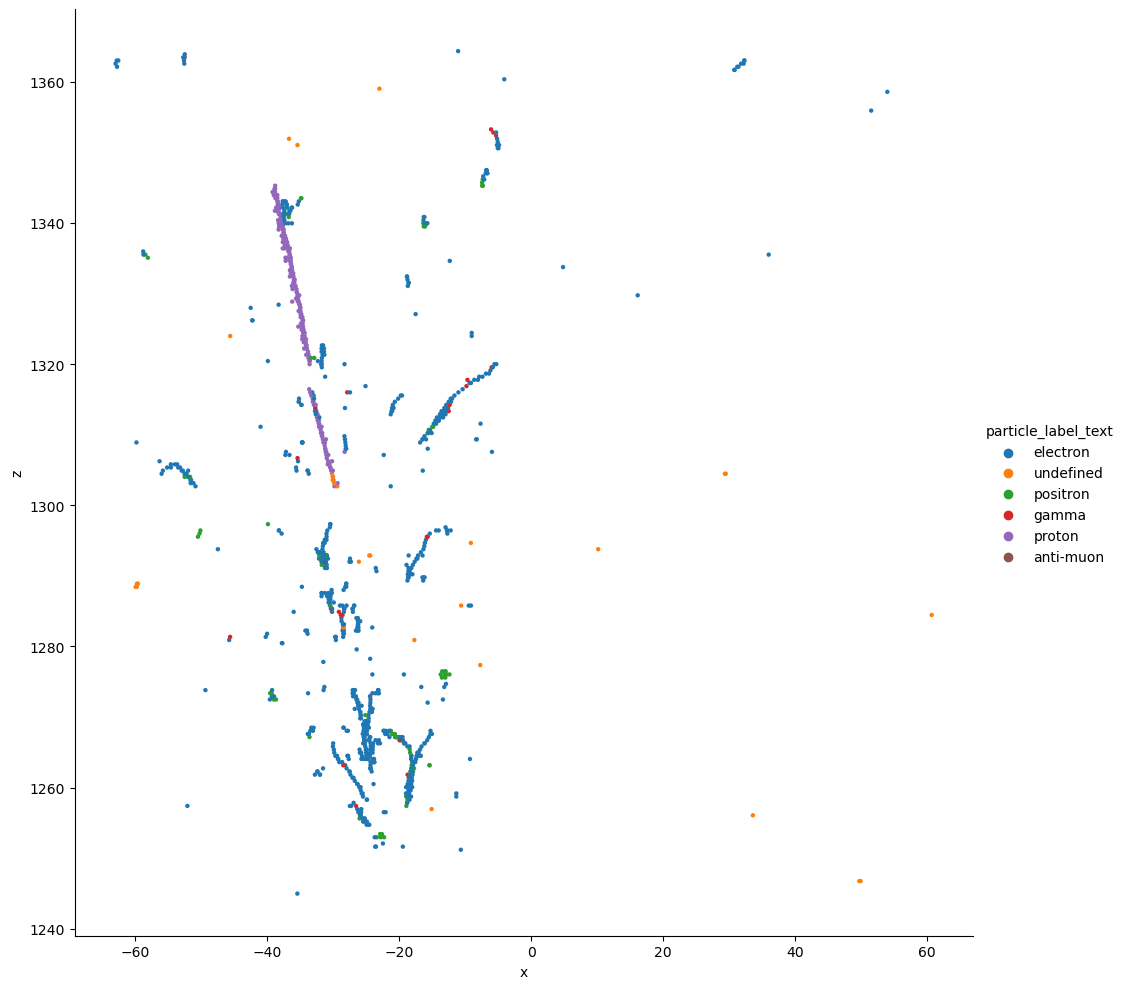

In [398]:
sn.relplot(
    data=df_3,
    x="x", y="z",
    hue="particle_label_text",
    linewidth=0,
    s=10,
    height=10
)
plt.show()

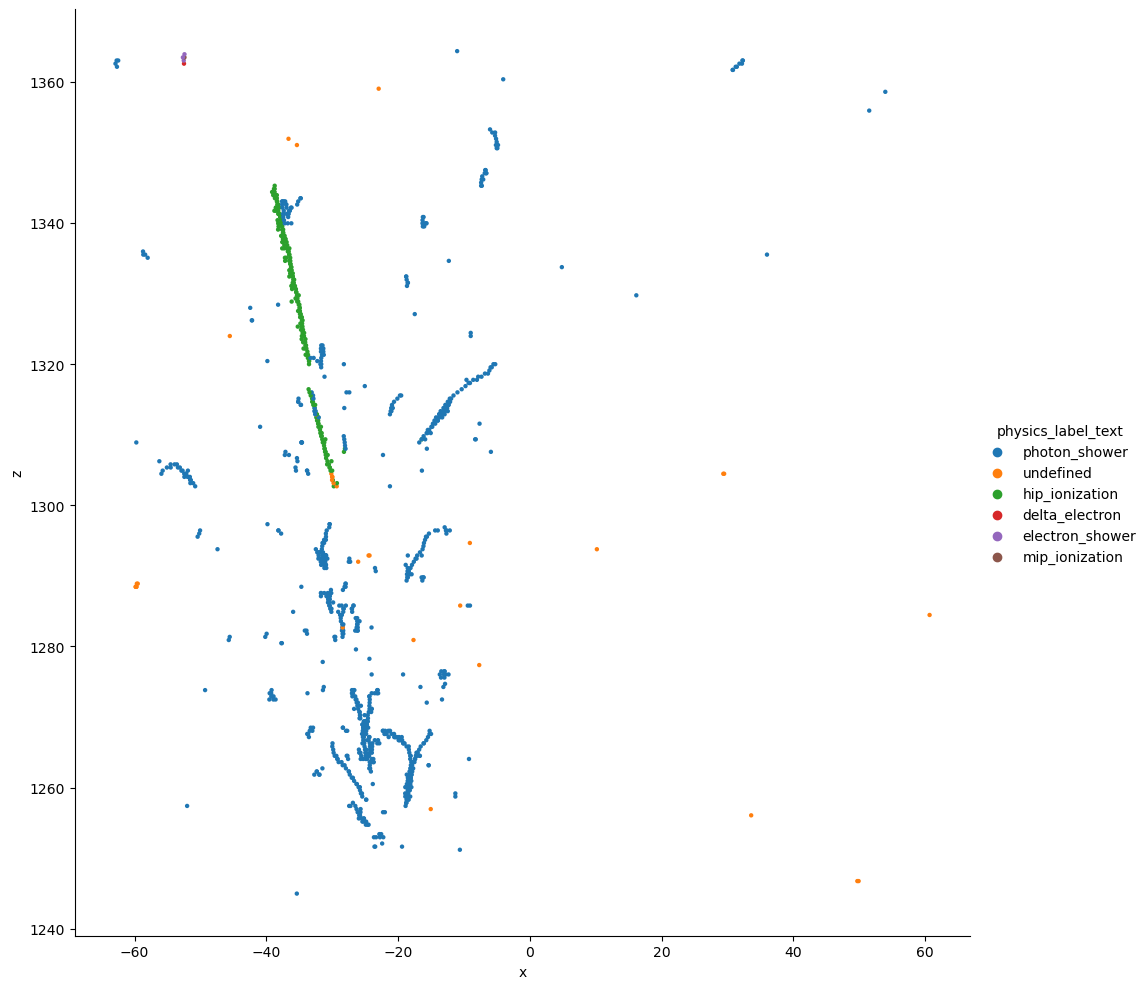

In [399]:
sn.relplot(
    data=df_3,
    x="x", y="z",
    hue="physics_label_text",
    linewidth=0,
    s=10,
    height=10
    
)
plt.show()

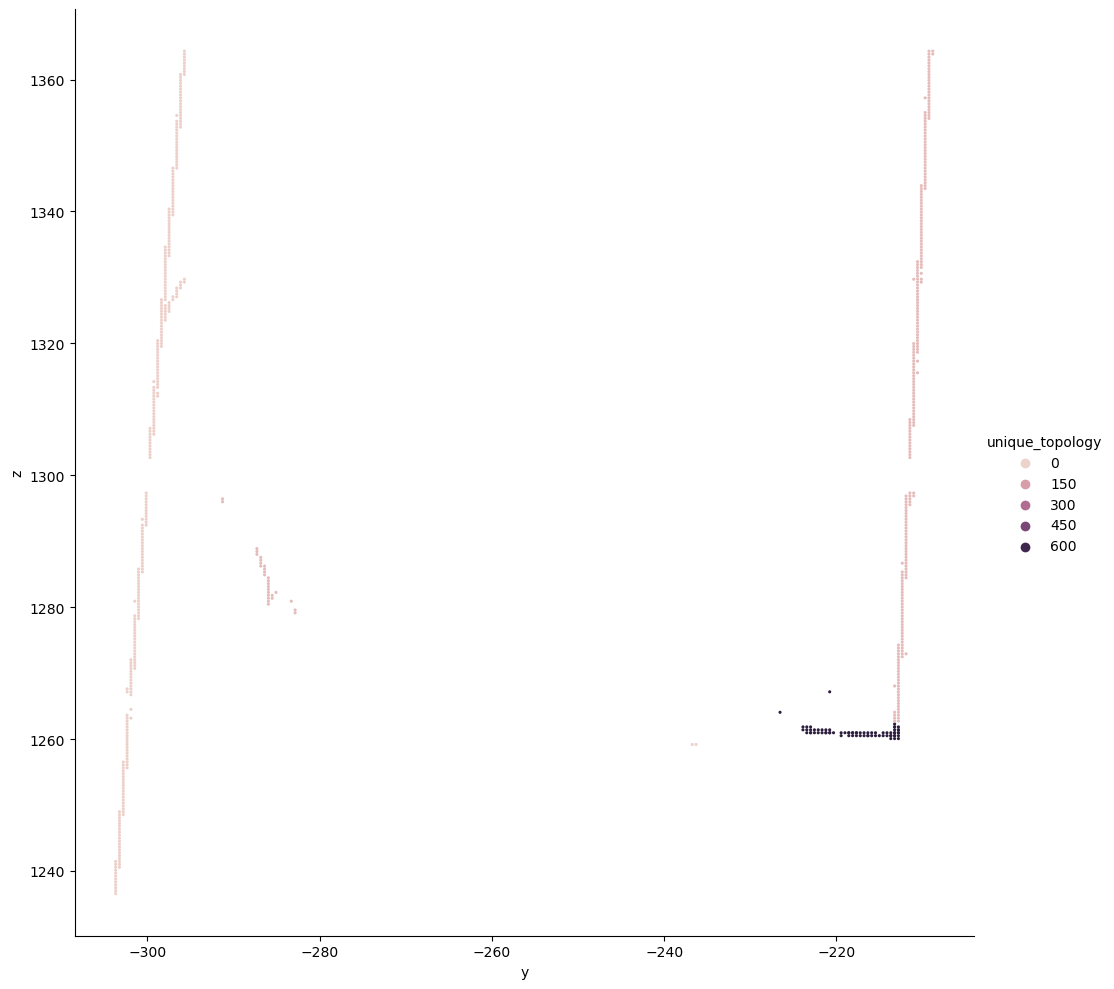

In [392]:
sn.relplot(
    data=df_3,
    x="y", y="z",
    hue="unique_topology",
    linewidth=0,
    s=5,
    height=10
)
plt.show()

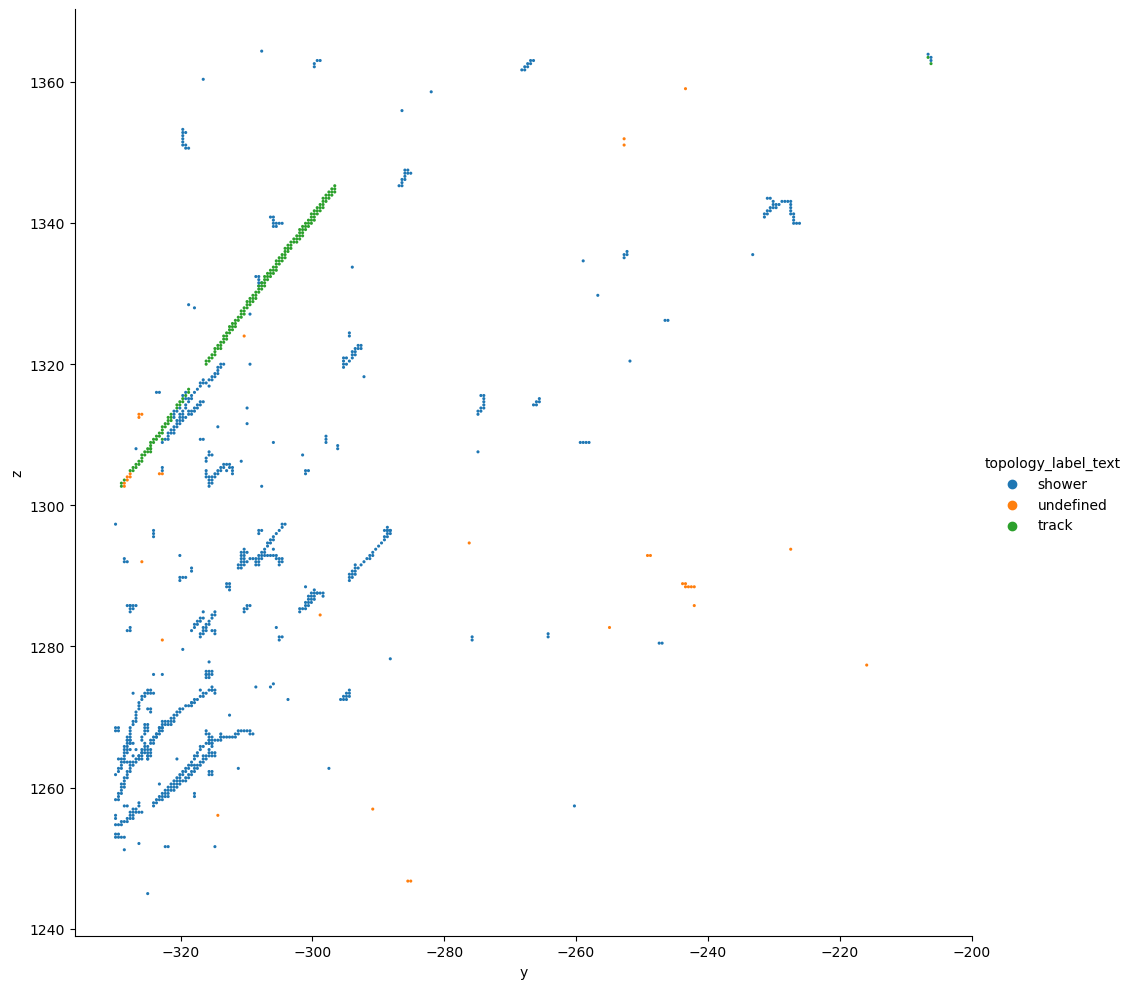

In [361]:
sn.relplot(
    data=df_3,
    x="y", y="z",
    hue="topology_label_text",
    linewidth=0,
    s=5,
    height=10
)
plt.show()

In [362]:
physics_labels_full = []
for i, cloud in enumerate(arr['data'].tolist()):
    physics_labels_full.append(arr['data'].tolist()[cloud].data['physics_label'])
                          

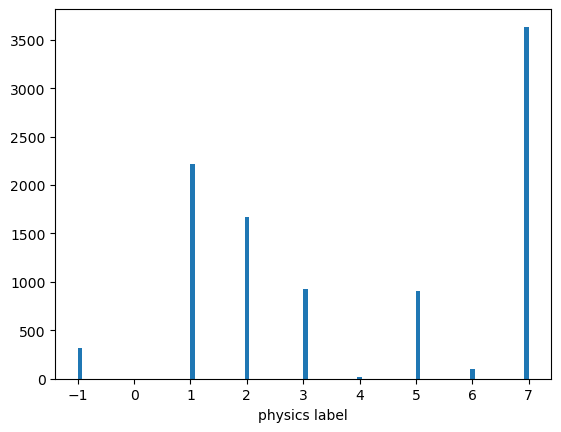

In [352]:
plt.hist([item for sublist in physics_labels_full for item in sublist], bins=100)
plt.xlabel('physics label')
plt.show()

In [22]:
particle_labels_full = []
for i, cloud in enumerate(arr['data'].tolist()):
    particle_labels_full.append(arr['data'].tolist()[cloud].data['particle_label'])

In [23]:
np.unique([item for sublist in particle_labels_full for item in sublist])

array([-1.30000000e+01, -1.10000000e+01, -1.00000000e+00,  1.10000000e+01,
        1.30000000e+01,  2.20000000e+01,  2.11000000e+02,  2.11200000e+03,
        2.21200000e+03,  1.00017037e+09,  1.00018040e+09])

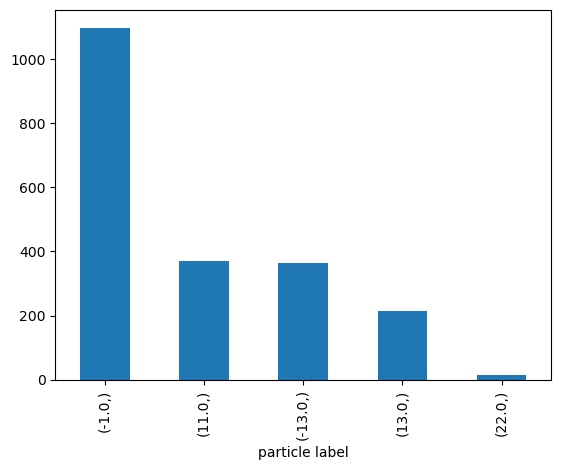

In [23]:
dd = pd.DataFrame([item for sublist in particle_labels_full for item in sublist])
dd.value_counts().plot(kind='bar')
#plt.hist([item for sublist in particle_labels_full for item in sublist], bins=np.unique([item for sublist in particle_labels_full for item in sublist]))
plt.xlabel('particle label')
#plt.xlim(-23, 23)
plt.show()

In [23]:
topology_labels_full = []
for i, cloud in enumerate(arr['data'].tolist()):
    topology_labels_full.append(arr['data'].tolist()[cloud].data['topology_label'])

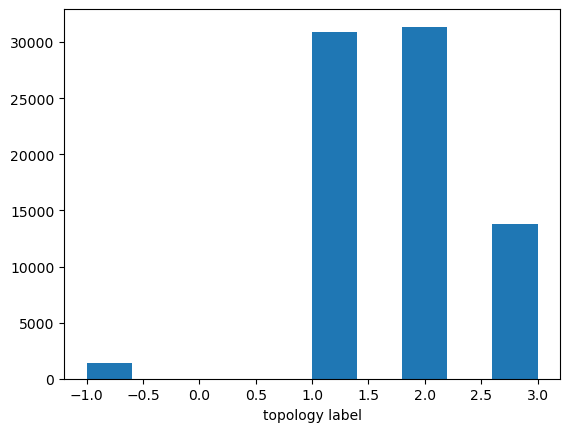

In [24]:
plt.hist([item for sublist in topology_labels_full for item in sublist])
plt.xlabel('topology label')
plt.show()